# MA943 - Numerical Methods

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [4]:
using Conda
Conda.add("mpmath")

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment C:\Users\mohammad\.julia\v0.6\Conda\deps\usr:

The following NEW packages will be INSTALLED:

    mpmath: 0.19-py27h2868657_2  

The following packages will be UPDATED:

    conda:  4.3.27-py27hcd9d231_0 --> 4.3.30-py27he817781_0

mpmath-0.19-py 100% |###############################| Time: 0:00:00   2.32 MB/s 0:00:00   2.35 MB/s
conda-4.3.30-p 100% |###############################| Time: 0:00:00   2.50 MB/s


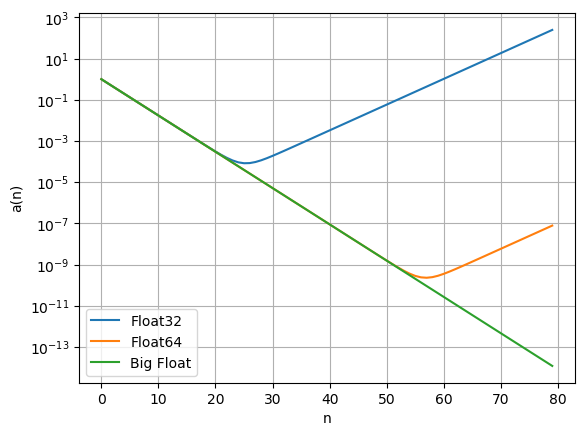

In [7]:
using PyPlot
a=zeros(Float32,80)
a_d=zeros(80)
a_b=zeros(BigFloat,80)
a[1]=1
a[2]=2/3
a_d[1]=1
a_d[2]=2/3S
a_b[1]=BigFloat(1)
a_b[2]=BigFloat(2)/BigFloat(3)
for i=3:80
    a[i]=2*a[i-1]-(8/9)*a[i-2]
    a_d[i]=2*a_d[i-1]-(8/9)*a_d[i-2]
    a_b[i]=BigFloat(2)*a_b[i-1]-(BigFloat(8)/BigFloat(9))*a_b[i-2]
end
semilogy(a,label="Float32")
semilogy(a_d,label="Float64")
semilogy(a_b,label="Big Float")
xlabel("n")
ylabel("a(n)")
legend()
grid();

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



In [21]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

a = [1,2,3,4]
b = [2,6,7,8]
mergepresorted(a,b)

8-element Array{Int64,1}:
 1
 2
 2
 3
 4
 6
 7
 8

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [25]:
function mergeSort(A)
    n = length(A)
    if n==1
        return A
    else
        m = n/2
        m = Int(m)
        return mergepresorted(mergeSort(A[1:m]), mergeSort(A[m+1:n]))
    end
end

a = rand(1:100,16)
a = mergeSort(a)



16-element Array{Int64,1}:
  8
  8
  9
 12
 18
 18
 21
 37
 53
 53
 63
 83
 83
 84
 99
 99

In [23]:
time = zeros(15)
time_t= zeros(15)
for i=1:15
    n = 2^i
    a = rand(1:40000,n)
    t = @timed mergeSort(a)
    time[i] = t[2]
    time_t[i] = (n)*(log(n))
end;

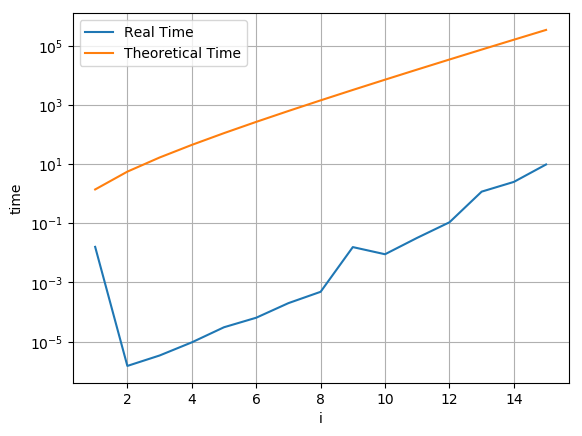

In [26]:
i = 1:15
semilogy(i, time,label="Real Time")
semilogy(i, time_t,label="Theoretical Time")
xlabel("i")
ylabel("time")
legend()
grid();